# 문제

- 아래 마직막 코드는 Blur, identity, outline, Sharpen, bottom sobel 5개 필터를 사용하여 5개의 출력을 얻었습니다.
  Blur, outline, bottom sobel 3개의 필터를 사용하여 3개의 출력을 얻도록 코드를 수정하시오.

In [11]:
import torch
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init
import numpy as np
import matplotlib.pyplot as plt

[3, torch.Size([1, 28, 28]), torch.float32]


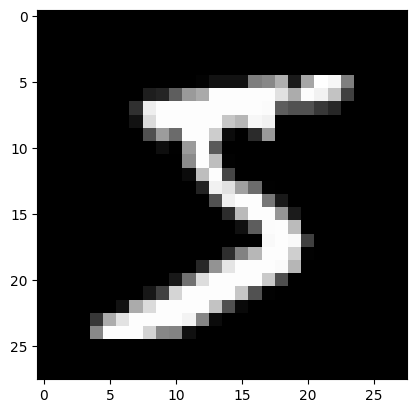

In [12]:
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

img, _ = mnist_train[0] # x is now a torch.Tensor
print([img.ndim, img.shape, img.dtype])

plt.imshow(img.numpy()[0], cmap='gray')

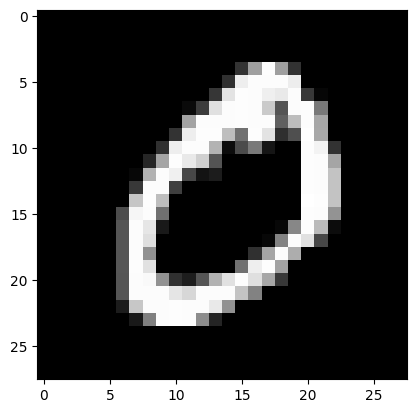

In [8]:
img, _ = mnist_train[1] # x is now a torch.Tensor
plt.imshow(img.numpy()[0], cmap='gray')

img.shape torch.Size([1, 1, 28, 28])
(5, 1, 3, 3)
conv2d_img_01.shape torch.Size([1, 5, 28, 28])


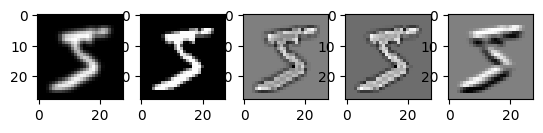

In [15]:
img = img.reshape(-1,1,28,28)
# print("img:\n", img)
print("img.shape", img.shape)

weight_01 = np.array([
#Blur
 [[[0.0625, 0.125, 0.0625],
   [0.125,  0.25,  0.125],
   [0.0625, 0.125, 0.0625]]],
#identity
 [[[ 0.,     0.,    0.],
   [ 0.,     1.,    0.],
   [ 0.,     0.,    0.]]],
#outline
 [[[-1.,    -1.,   -1.],
   [-1.,     8.,   -1.],
   [-1.,    -1.,   -1.]]],
#Sharpen
 [[[ 0.,    -1.,    0.],
   [-1.,     5.,   -1.],
   [ 0.,    -1.,    0.]]],
#bottom sobel
 [[[-1.,    -2.,   -1.],
   [ 0.,     0.,    0.],
   [ 1.,     2.,    1.]]]
])

print(weight_01.shape)


conv1 = torch.nn.Conv2d(1, 5, kernel_size=3, stride=1, padding=1)
conv1.weight.data = torch.Tensor(weight_01)

conv2d_img_01 = conv1(Variable(img))
print("conv2d_img_01.shape", conv2d_img_01.shape)
conv2d_img_01_numpy = conv2d_img_01.detach().numpy()
conv2d_img_01_numpy = np.swapaxes(conv2d_img_01_numpy, 0, 1)
for i, one_img in enumerate(conv2d_img_01_numpy):
    #print(one_img.shape)
    #print(one_img.reshape(28,28))
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(28,28), cmap='gray')

# 정답

img.shape torch.Size([1, 1, 28, 28])
(3, 1, 3, 3)
conv2d_img_01.shape torch.Size([1, 3, 28, 28])


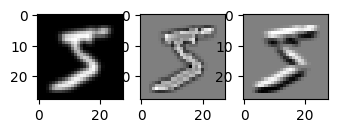

In [16]:
#Blur, outline, bottom sobel 3개의 필터를 사용하여 3개의 출력
img = img.reshape(-1,1,28,28)
img = img.reshape(-1,1,28,28)
# print("img:\n", img)
print("img.shape", img.shape)

weight_01 = np.array([
#Blur
 [[[0.0625, 0.125, 0.0625],
   [0.125,  0.25,  0.125],
   [0.0625, 0.125, 0.0625]]],
#outline
 [[[-1.,    -1.,   -1.],
   [-1.,     8.,   -1.],
   [-1.,    -1.,   -1.]]],
#bottom sobel
 [[[-1.,    -2.,   -1.],
   [ 0.,     0.,    0.],
   [ 1.,     2.,    1.]]]
])

print(weight_01.shape)


conv1 = torch.nn.Conv2d(1, 3, kernel_size=3, stride=1, padding=1)
conv1.weight.data = torch.Tensor(weight_01)

conv2d_img_01 = conv1(Variable(img))
print("conv2d_img_01.shape", conv2d_img_01.shape)
conv2d_img_01_numpy = conv2d_img_01.detach().numpy()
conv2d_img_01_numpy = np.swapaxes(conv2d_img_01_numpy, 0, 1)
for i, one_img in enumerate(conv2d_img_01_numpy):
    #print(one_img.shape)
    #print(one_img.reshape(28,28))
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(28,28), cmap='gray')